In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.decomposition import PCA
from numpy import linalg as la

In [2]:
column_names = ['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
column_types = ['str','int','int','int','int','int','int','int','int','int','int','int','int',  'int'  ,'int','int','int','int']
column_types = dict(zip(column_names,column_types))
df = pd.read_csv('zoo.csv', names=column_names, dtype=column_types)

df = df.set_index('name')
# get labels
labels = df['type']
df.drop('type', axis=1, inplace=True)

# scale data to 0/1
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit(df).transform(df))

In [3]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


In [4]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       101 non-null    float64
 1   1       101 non-null    float64
 2   2       101 non-null    float64
 3   3       101 non-null    float64
 4   4       101 non-null    float64
 5   5       101 non-null    float64
 6   6       101 non-null    float64
 7   7       101 non-null    float64
 8   8       101 non-null    float64
 9   9       101 non-null    float64
 10  10      101 non-null    float64
 11  11      101 non-null    float64
 12  12      101 non-null    float64
 13  13      101 non-null    float64
 14  14      101 non-null    float64
 15  15      101 non-null    float64
dtypes: float64(16)
memory usage: 12.8 KB


In [5]:
data = df.to_numpy()

In [6]:
# PCA
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)
transformed_data = transformed_data.T # [0]=x_axes [1]=y_axes
transformed_data.shape

(2, 101)

No handles with labels found to put in legend.


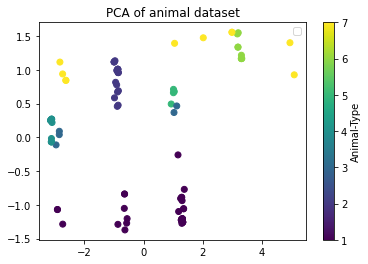

In [7]:
# plot PCA
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'darkred', 'green', 'yellow', 'purple']

plt.scatter(transformed_data[0], transformed_data[1], c=labels) #, cmap='summer')
color_bar = plt.colorbar()
color_bar.set_label('Animal-Type')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of animal dataset')

plt.show()

In [8]:
# data analysis based on the results of PCA 
# specifically check the yellow points to understand the scatter
type(labels)
mask = np.where(labels == 7, True, False)
print(sum(mask))
yellow_points = df[mask]
yellow_points

10


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
name,,,,,,,,,,,,,,,,
clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0


In [9]:
# test MDS with sklearn module
from sklearn.manifold import MDS
mds_embedding = MDS(n_components=2)
X_transformed = mds_embedding.fit_transform(data)
X_transformed = X_transformed.T
X_transformed.shape

(2, 101)

No handles with labels found to put in legend.


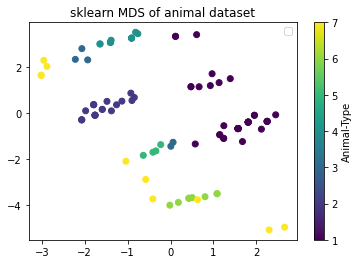

In [10]:
# plot test MDS
plt.figure()

plt.scatter(X_transformed[0], X_transformed[1], c=labels) #, cmap='summer')
color_bar = plt.colorbar()
color_bar.set_label('Animal-Type')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('sklearn MDS of animal dataset')

plt.show()

In [11]:
# compute distance matrix
# distance matrix euclidean
euclidean_distance_matrix = euclidean_distances(data, data)
#use weighted features by their entropy and create own weightes-distance
"""
Not sure what is meant with attribute importance here, so I interprete it as some way of weighting the feature.
For example by entropy or variance. As used in some other 
"""
from scipy.stats import entropy
from math import log, e

def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

def weighted_distance(data):
    num_dp, num_feat = data.shape
    feature_entropy = []
    for col in range(16):
        scaled_data[col]
    
    # calculate entropy of columns
    feature_entropy = []
    for name, values in scaled_data.iteritems():
        feature_entropy.append(pandas_entropy(values.values))
        print(feature_entropy[-1])
    
    distance_matrix = np.zeros((num_dp, num_dp))
    
    for i,p1 in enumerate(data):
        for j,p2 in enumerate(data):
            inner_sum = 0
            for feature_idx in range(num_feat):
                inner_sum += feature_entropy[feature_idx] * (p1[feature_idx]-p2[feature_idx])**2
            distance_matrix[i][j] = np.sqrt(inner_sum)
    return distance_matrix
weighted_distance_matrix = weighted_distance(data)

0.6820779466777396
0.4976450019942558
0.6789142479468148
0.6753469676511341
0.548325374157256
0.6513397809240676
0.6872046087142025
0.6713731517013639
0.46868029813582784
0.511188814206582
0.2768305643987694
0.45320726979379394
1.4097305989288802
0.5703470663087662
0.383932582969159
0.6848406538811322


In [12]:
# MDS 
# function to center a matrix
centering_matrix = lambda n: np.identity(n) -(np.ones((n, 1)) @ np.ones((1, n)))/n # where n is the matrices dimentionality

# choose a distance matric to use
distance_matrix = weighted_distance_matrix
N, D = distance_matrix.shape

# use the centering matrix to compute the gram matrix(similarity matrix) by double centering
gram_from_distance = -(centering_matrix(N) @ distance_matrix @ centering_matrix(N))/2
u, s, vh = la.svd(gram_from_distance) # s= diagonal singularvalue matrix, beware vectors/eigenvalues are ordered asce
assert np.all(s[:2] > 0) # check that eigenvalues are positve!
embeding = np.diag((s[:2])) @ vh[:2] # get the embeding

No handles with labels found to put in legend.


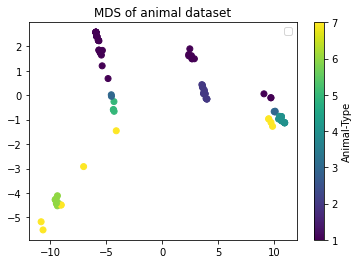

In [13]:
# plot MDS
plt.figure()

plt.scatter(embeding[0], embeding[1], c=labels) #, cmap='summer')
color_bar = plt.colorbar()
color_bar.set_label('Animal-Type')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('MDS of animal dataset')

plt.show()

(101, 2)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=21, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


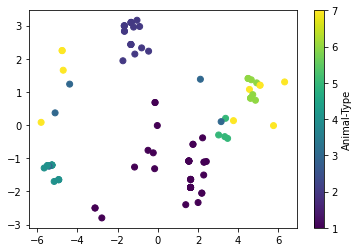

In [91]:
# ISOMAP library example
from sklearn.manifold import Isomap

n_neighbors = 21
n_components = 2

isomap_data = Isomap(n_neighbors, n_components).fit_transform(data)
print(isomap_data.shape)
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], c=labels)
color_bar = plt.colorbar()
color_bar.set_label('Animal-Type')
plt.title("Isomap from sk-learn")
plt.show()

In [81]:
# ISOMAP
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.utils.graph_shortest_path import graph_shortest_path
n_neighbors = 25
nbrs = NearestNeighbors(n_neighbors=n_neighbors,
                        algorithm='auto',
                        metric='minkowski',
                        p=2,
                        metric_params=None,
                        n_jobs=None).fit(data)
nearest_neighbor_graph = kneighbors_graph(nbrs, n_neighbors, mode='distance', include_self=True)
geodesic_distances = graph_shortest_path(nearest_neighbor_graph, method='FW')

# do MDS on geodesic distances
# use the centering matrix to compute the gram matrix(similarity matrix) by double centering
gram_from_geodesic_distances = -(centering_matrix(N) @ geodesic_distances @ centering_matrix(N))/2
w, v = la.eig(gram_from_geodesic_distances) # w= diagonal eigenvalue matrix,
assert np.all(w[:2] > 0) # check that eigenvalues are positve!
isomap_embeding = np.diag(np.sqrt(w[:2])) @ v.T[:2] # get the embeding

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
No handles with labels found to put in legend.


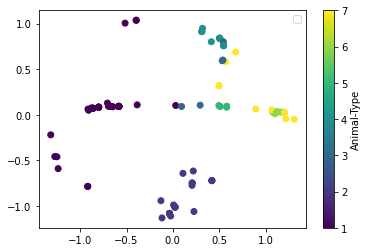

In [82]:
# plot ISOMAP
plt.figure()

plt.scatter(isomap_embeding[0], isomap_embeding[1], c=labels) #, cmap='summer')
color_bar = plt.colorbar()
color_bar.set_label('Animal-Type')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ISOMAP of animal dataset')

plt.show()